## Word Embeddings, Clustering and Vectorization Workshop
Tutorial for extracting word embeddings from words.<br>

**Team Members:**

   - *Edwin Lopez*
   - *Sabrina Ronnie George Karippatt* 

## Part 1: Vector Stores and Dimensionality Reduction

### 🔤 Introduction to Word2Vec

**What is Word2Vec?**

Word2Vec is a popular algorithm used in Natural Language Processing (NLP) to transform words into vector representations.
It learns these word vectors (embeddings) from a large collection of text so that words with similar meanings are located close to each other in a high-dimensional space.

**Who developed it and when?**

Word2Vec was developed by a team of researchers at Google, led by Tomas Mikolov, in 2013.

**Who currently maintains and supports new releases?**

While the original research came from Google, the open-source Python library gensim now maintains Word2Vec functionality.
gensim is maintained by the open-source community, originally developed by Radim Řehůřek.

### 🔤 Word2Vec embeddings using the Gensim library

Word2Vec is a popular technique for learning word embeddings, which are dense vector representations of words that capture semantic relationships between words based on their context.<br>
As discussed, Word2Vec have 2 types, Skipgrams and CBOW. Where SkipGrams are trained to predict context words given the target word, however CBOW is trained to predict target words given its context.


- Requirements: downloading punkt from nltk, and installing gensim library

In [18]:
# importing needed libraries
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import re
import os

# Warning: This download will copy files to your home directory.
# For example, on Linux, it will copy files to ~/.nltk_data.
# In Windows, it will copy files to C:\Users\YourAccount\AppData\Roaming
# nltk.download('punkt')

# A better way to handle the download is to:
# Ensure 'punkt' is available and nltk_data path is set
nltk_data_path = os.path.join(os.getcwd(), "nltk_data")
print("Downloading 'punkt' tokenizer...")
nltk.download("punkt", download_dir=nltk_data_path, force=True)
print("Downloading 'punkt_tab' tokenizer...")
nltk.download("punkt_tab", download_dir=nltk_data_path, force=True)

# Always append the custom nltk_data path (if not already present)
if nltk_data_path not in nltk.data.path:
    nltk.data.path.append(nltk_data_path)

# Debugging paths and contents
print("NLTK Data Paths:", nltk.data.path)
print("Contents of nltk_data:", os.listdir(nltk_data_path))

[nltk_data] Downloading package punkt to c:\Users\user\1557_VSC\Machin
[nltk_data]     eLearning\Week13_Lab3\EmbeddingClusteringVectorization
[nltk_data]     Workshop2\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


[nltk_data] Downloading package punkt_tab to c:\Users\user\1557_VSC\Ma
[nltk_data]     chineLearning\Week13_Lab3\EmbeddingClusteringVectoriza
[nltk_data]     tionWorkshop2\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


NLTK Data Paths: ['C:\\Users\\user/nltk_data', 'c:\\Users\\user\\1557_VSC\\MachineLearning\\Week13_Lab3\\.venv\\nltk_data', 'c:\\Users\\user\\1557_VSC\\MachineLearning\\Week13_Lab3\\.venv\\share\\nltk_data', 'c:\\Users\\user\\1557_VSC\\MachineLearning\\Week13_Lab3\\.venv\\lib\\nltk_data', 'C:\\Users\\user\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'c:\\Users\\user\\1557_VSC\\MachineLearning\\Week13_Lab3\\EmbeddingClusteringVectorizationWorkshop2\\nltk_data']
Contents of nltk_data: ['tokenizers']


**How do I use Word2Vec in Python and Jupyter Notebooks?**

To use Word2Vec in Python, we typically start by following the NLP pipeline to produce a set of tokens:

In [19]:
# Sample Sentence
text = """
Natural language processing (NLP) is a subfield of artificial intelligence (AI) that focuses on the interaction between computers and humans through natural language. NLP techniques aim to enable computers to understand, interpret, and generate human language in a way that is both meaningful and contextually relevant.
"""
tokenized_words = word_tokenize(text.lower())
tokenized_words

['natural',
 'language',
 'processing',
 '(',
 'nlp',
 ')',
 'is',
 'a',
 'subfield',
 'of',
 'artificial',
 'intelligence',
 '(',
 'ai',
 ')',
 'that',
 'focuses',
 'on',
 'the',
 'interaction',
 'between',
 'computers',
 'and',
 'humans',
 'through',
 'natural',
 'language',
 '.',
 'nlp',
 'techniques',
 'aim',
 'to',
 'enable',
 'computers',
 'to',
 'understand',
 ',',
 'interpret',
 ',',
 'and',
 'generate',
 'human',
 'language',
 'in',
 'a',
 'way',
 'that',
 'is',
 'both',
 'meaningful',
 'and',
 'contextually',
 'relevant',
 '.']

**What is a model in Word2Vec?**

A Word2Vec model is a trained neural network that maps words from your dataset to numerical vectors (embeddings).
The model learns word relationships based on how often they appear together in context.

After the model is trained, each word in your vocabulary is now represented by a vector of numbers that can be used in tasks like similarity, clustering, or classification.

#### 🧠 Explanation of the model creation instruction

- `sentences`: A list of tokenized sentences (in this case, [tokenized_words] means a list of words).
- `vector_size=100`: Each word will be represented by a vector with 100 dimensions.
- `window=5`: The model considers 5 words before and after the target word (context window).
- `min_count=1`: Include all words that appear at least once.
- `workers=4`: Uses 4 CPU threads to speed up training.

**This model will learn how words relate to each other and store them as vectors in its internal memory.**

In [20]:
# Create a model
model_word2Vec = Word2Vec(
    sentences=[tokenized_words], vector_size=100, window=5, min_count=1, workers=4
)

In [21]:
# Get word vector for a specific word
word = "natural"
vector_word2Vec = model_word2Vec.wv[word]
print(f"Word vector for '{word}' using Word2Vec: {vector_word2Vec}")

Word vector for 'natural' using Word2Vec: [-1.9428101e-03 -5.2659796e-03  9.4477097e-03 -9.2954319e-03
  4.5052692e-03  5.4033557e-03 -1.4071489e-03  9.0089496e-03
  9.8826429e-03 -5.4782177e-03 -6.0212663e-03 -6.7517818e-03
 -7.8889774e-03 -3.0443431e-03 -5.5920784e-03 -8.3447993e-03
  7.8853959e-04  2.9931944e-03  6.4117215e-03 -2.6343642e-03
 -4.4501973e-03  1.2521694e-03  3.9400163e-04  8.1163580e-03
  1.8195010e-04  7.2335410e-03 -8.2651470e-03  8.4343469e-03
 -1.8896088e-03  8.7051662e-03 -7.6160980e-03  1.7950600e-03
  1.0553870e-03  3.8771374e-05 -5.1055676e-03 -9.2426352e-03
 -7.2625973e-03 -7.9506449e-03  1.9089831e-03  4.7897184e-04
 -1.8130449e-03  7.1189236e-03 -2.4739422e-03 -1.3462100e-03
 -8.8952789e-03 -9.9256253e-03  8.9443158e-03 -5.7570883e-03
 -6.3713118e-03  5.1996382e-03  6.6684661e-03 -6.8323021e-03
  9.5778168e-04 -6.0134367e-03  1.6455727e-03 -4.2872936e-03
 -3.4413836e-03  2.1873817e-03  8.6617842e-03  6.7299707e-03
 -9.6773999e-03 -5.6279455e-03  7.8832312e-


#### 📊 Understanding Word Vectors in Word2Vec

#### 🔢 Code Recap

```python
# Get word vector for a specific word
word = "natural"
vector_word2Vec = model_word2Vec.wv[word]
print(f"Word vector for '{word}' using Word2Vec: {vector_word2Vec}")
```

This code retrieves the **vector representation (embedding)** of the word `"natural"` from the trained Word2Vec model.

#### 🧠 What Is a Word Vector?

In **Word2Vec**, every word in your vocabulary is represented by a **dense vector** of real numbers.

* Each word becomes a **point** in a high-dimensional space.
* Words that appear in similar contexts are placed **closer together**.
* These vectors are learned by a shallow neural network during training.

The output you see is a **vector with 100 dimensions**, because we set `vector_size=100` when training the model.

#### ✍️ What Do These Numbers Mean?

The output:

```python
[ 9.7677782e-03, 8.1660571e-03, ..., -2.3143364e-03 ]
```

...is a list of 100 floating-point numbers, like:

$$
\vec{v}_{\text{natural}} = [v_1, v_2, v_3, \ldots, v_{100}]
$$

This vector encodes the **semantic meaning** of the word *natural* based on its context in the training data.

While **each individual number doesn't mean anything by itself**, together they represent a **position** in a 100-dimensional space.

#### 🔍 Why Is This Useful?

You can perform various mathematical operations with these vectors:

#### **Similarity** between words

We can compute **cosine similarity** to check how similar two words are:

$$
\text{cosine\_similarity}(\vec{v}_a, \vec{v}_b) = \frac{\vec{v}_a \cdot \vec{v}_b}{\|\vec{v}_a\| \|\vec{v}_b\|}
$$

If two word vectors point in a similar direction (small angle), they are semantically similar.

#### 🧮 Summary

* The output is a **100-dimensional vector** for the word `"natural"`.
* Each dimension is a learned number that helps position the word in a semantic space.
* These vectors are powerful tools for **clustering**, **search**, **recommendations**, and more.


In [22]:
# Find similar words
similar_words_word2Vec = model_word2Vec.wv.most_similar(word)
print(f"Similar words to '{word}' using Word2Vec: {similar_words_word2Vec}")

Similar words to 'natural' using Word2Vec: [('subfield', 0.2477034479379654), ('focuses', 0.23781010508537292), ('.', 0.15014639496803284), ('interpret', 0.1489964723587036), ('nlp', 0.1281409114599228), ('enable', 0.1139271929860115), ('humans', 0.09733925759792328), ('and', 0.09313160181045532), ('contextually', 0.0922219306230545), ('intelligence', 0.0911305621266365)]


#### 🔍 Finding Similar Words with Word2Vec

#### 🔢 Code Recap

```python
# Find similar words
similar_words_word2Vec = model_word2Vec.wv.most_similar(word)
print(f"Similar words to '{word}' using Word2Vec: {similar_words_word2Vec}")
```

This code retrieves the **top 10 words** that are most similar to the word `"natural"` according to the Word2Vec model.

#### 🧠 What Does “Similar” Mean in Word2Vec?

Word2Vec considers words to be similar if their **vector representations** are **close together** in high-dimensional space.

This closeness is measured using **cosine similarity**:

$$
\text{cosine\_similarity}(\vec{v}_a, \vec{v}_b) = \frac{\vec{v}_a \cdot \vec{v}_b}{\|\vec{v}_a\| \|\vec{v}_b\|}
$$

Where:

* $\vec{v}_a$ and $\vec{v}_b$ are the word vectors.
* $\cdot$ is the dot product.
* $\|\vec{v}\|$ is the magnitude (length) of vector $\vec{v}$.

This produces a value between **-1 and 1**:

* **1** → perfectly similar (same direction)
* **0** → no similarity (orthogonal)
* **-1** → completely opposite

#### 📤 Example Output Explained

```python
[('the', 0.182), ('computers', 0.173), ('nlp', 0.167), ('between', 0.156), ...]
```

This means:

| Word       | Cosine Similarity |
| ---------- | ----------------: |
| the        |             0.182 |
| computers  |             0.173 |
| nlp        |             0.167 |
| between    |             0.156 |
| way        |             0.133 |
| techniques |             0.122 |
| human      |             0.112 |
| is         |             0.111 |
| .          |             0.109 |
| in         |             0.097 |

These words appeared in **similar contexts** to `"natural"` in the training data.

💡 Example: If the training sentences included phrases like *"natural language processing"*, and also had *"nlp techniques"*, *"human language"*, or *"way computers process language"*, then `"nlp"`, `"human"`, `"techniques"`, and `"computers"` would naturally be nearby in vector space.

#### 🎯 Summary

* Word2Vec learned that these words tend to appear **in similar contexts** to `"natural"`.
* The similarity is calculated using **cosine similarity** on the word vectors.
* The output is a **ranked list** of the most contextually similar words.

You can use this method for:

* **Synonym detection**
* **Query expansion in search engines**
* **Exploring semantic relationships in text**


SKIPGRAM

In [23]:
# Create a model
model_skipGram = Word2Vec(
    sentences=[tokenized_words], vector_size=100, window=5, min_count=1, workers=4, sg=1
)

# Get word vector for a specific word
vector_skipGram = model_skipGram.wv[word]
print(f"Word vector for '{word}' using Word2Vec: {vector_skipGram}")

# Find similar words
similar_words_skipGrams = model_skipGram.wv.most_similar(word)
print(f"Similar words to '{word}' using Word2Vec: {similar_words_skipGrams}")

Word vector for 'natural' using Word2Vec: [-1.9321169e-03 -5.2483547e-03  9.4544906e-03 -9.2837224e-03
  4.4994610e-03  5.3914869e-03 -1.3959594e-03  9.0288678e-03
  9.8756803e-03 -5.4979529e-03 -6.0152854e-03 -6.7671919e-03
 -7.8648757e-03 -3.0349847e-03 -5.5805137e-03 -8.3396826e-03
  8.1575551e-04  2.9894954e-03  6.3903220e-03 -2.6621453e-03
 -4.4344361e-03  1.2641826e-03  4.0435637e-04  8.1096366e-03
  1.6329886e-04  7.2371974e-03 -8.2724625e-03  8.4320260e-03
 -1.8909355e-03  8.7151248e-03 -7.6115341e-03  1.7841731e-03
  1.0538050e-03  8.1357475e-06 -5.1192981e-03 -9.2276307e-03
 -7.2482466e-03 -7.9528000e-03  1.8848567e-03  4.7819575e-04
 -1.8095361e-03  7.1224878e-03 -2.4662046e-03 -1.3527130e-03
 -8.8796709e-03 -9.9325730e-03  8.9337984e-03 -5.7706139e-03
 -6.3643786e-03  5.2108620e-03  6.6559934e-03 -6.8443152e-03
  9.4641995e-04 -6.0298033e-03  1.6457191e-03 -4.2782631e-03
 -3.4359298e-03  2.1962207e-03  8.6636264e-03  6.7324229e-03
 -9.6782390e-03 -5.6465934e-03  7.8966795e-

#### 🧠 Understanding Skip-grams in Word2Vec

### 🔁 What Are Skip-grams?

A **Skip-gram** is a training approach used in Word2Vec that **predicts context words given a center word**.

> 🔑 Goal: For a given target word, predict the words that are likely to appear nearby in a sentence.

#### 📚 How Does Skip-gram Work?

Let’s take a sentence:

```
"The field of natural language processing is growing."
```

If the center word is `"natural"` and the window size is 2, the context window is:

```python
["of", "natural", "language", "processing"]
```

The skip-gram model will create training pairs like:

```python
("natural", "of"), ("natural", "language")
```
<br/>

🧠 The model **learns embeddings** by trying to **maximize the probability** of seeing context words given the center word.

#### 📐 The Skip-gram Objective Function

The skip-gram model aims to maximize the following log-likelihood objective over a large corpus:

$$
\frac{1}{T} \sum_{t=1}^{T} \sum_{-c \leq j \leq c, j \neq 0} \log P(w_{t+j} \mid w_t)
$$

Where:

* $T$ is the total number of words in the corpus
* $w_t$ is the center word
* $w_{t+j}$ are the surrounding context words
* $c$ is the window size

The probability $P(w_{t+j} \mid w_t)$ is computed using softmax:

$$
P(w_O \mid w_I) = \frac{\exp\left({\vec{v}_{w_O}^\top \vec{v}_{w_I}}\right)}{\sum_{w = 1}^{V} \exp\left({\vec{v}_w^\top \vec{v}_{w_I}}\right)}
$$

Where:

* $\vec{v}_{w_I}$: vector of the input word (center)
* $\vec{v}_{w_O}$: vector of the output/context word
* $V$: vocabulary size

### 🧪 Code Recap

```python
model_skipGram = Word2Vec(sentences=[tokenized_words], vector_size=100, window=5, min_count=1, workers=4, sg=1)
```

* `sg=1` activates the **Skip-gram** architecture (`sg=0` would activate CBOW instead).
* This model now learns word embeddings by training on `(center → context)` word pairs.

#### 📤 Output Explanation

#### ✅ Word Vector

```python
vector_skipGram = model_skipGram.wv[word]
```

Returns a **100-dimensional vector** for the word `"natural"` that reflects its learned representation based on surrounding context words.

#### ✅ Most Similar Words

```python
model_skipGram.wv.most_similar("natural")
```

Returns a list of the **top 10 most similar words** to `"natural"`, ranked by **cosine similarity** between their vectors.

Example output:

```python
[('the', 0.182), ('computers', 0.173), ('nlp', 0.168), ...]
```

These are the words that appeared in **similar contexts** to `"natural"` across the training data.
<br/>

🧠 This similarity emerges from the way skip-gram **updates** the vector for `"natural"` and its surrounding words whenever they co-occur — over time, semantically related words move closer together in vector space.

#### 🧭 Summary

| Component           | Role                                                     |
| ------------------- | -------------------------------------------------------- |
| Skip-gram Objective | Predicts context words based on a center word            |
| sg=1                | Enables skip-gram architecture in `Word2Vec()`           |
| Output Vector       | A 100D numeric representation of the word "natural"      |
| Similar Words       | Top 10 words that share similar context to "natural"     |
| Math Mechanism      | Uses dot products and softmax to update vector positions |


In [24]:
model_skipGram.save("saveModelSkipGram.bin")
# Word2Vec.load('path')

#### 💾 Saving and Loading a Word2Vec Skip-gram Model

#### ✅ What This Code Does

#### 📌 `model_skipGram.save('saveModelSkipGram.bin')`

* This **saves** the trained Word2Vec Skip-gram model to a file named `'saveModelSkipGram.bin'`.
* You can later load this file to **reuse the model** without retraining it.
* Useful for large models that take time to train.

#### 📌 `Word2Vec.load('path')`

* This **loads** a previously saved Word2Vec model from disk.
* You can then use the loaded model to get vectors or find similar words.

#### 🧠 Example

```python
# Save the model
model_skipGram.save('saveModelSkipGram.bin')

# Later or in another notebook
from gensim.models import Word2Vec
loaded_model = Word2Vec.load('saveModelSkipGram.bin')

# Use the loaded model
loaded_model.wv['natural']
```

#### 🗂️ Summary

| Action    | What It Does                      |
| --------- | --------------------------------- |
| `.save()` | Saves the trained model to a file |
| `.load()` | Loads the model back into memory  |



🔥 Important Practical Example

Imagine you have a pretrained Word2Vec on news articles, but your dataset is medical research papers.

Pretrained Word2Vec does not understand words like angiogenesis or fibrosis.

It may misrepresent words like "cell", which have different meanings in common English vs. biology.

➡️ Retraining or fine-tuning improves performance dramatically.

**How to use word2Vec for SkipGrams and CBOW? Explore whether they will give different results for similar words**

### 🧠 Clustering Words based on Cooccurence Pattern - **Brown Clustering**

> Brown Clustering is a method to cluster words based on their co-occurrence patterns.

> It starts with each word as a separate cluster and iteratively merges the most similar clusters based on their co-occurrence patterns.

> Brown Clustering is used for tasks like named entity recognition, word sense disambiguation, and topic modeling.

### Brown Corpus Clustering Tutorial

In this notebook, we will explore **word clustering** using the Brown corpus from NLTK. The goal is to visualize clusters of words based on their **co-occurrence patterns** using a **dendrogram**.

---

### Concepts Covered

1. **Brown Corpus**: A large collection of English text samples from 1961. It contains text from multiple genres, useful for NLP experiments.

2. **Vocabulary and Co-occurrence**:
   - Vocabulary (`vocab`): The set of unique words in a corpus.
   - Co-occurrence matrix: A square matrix where each entry `(i, j)` counts how often word `i` appears near word `j` within a defined **window size**.

3. **Word Clustering**:
   - Words that appear in similar contexts tend to have similar meanings.
   - We can use the co-occurrence matrix to cluster words hierarchically.

4. **Hierarchical Clustering & Dendrograms**:
   - **Hierarchical clustering** groups words step-by-step based on similarity.
   - A **dendrogram** is a tree diagram that shows the hierarchy of clusters.


In [25]:
# Step 1: Import Libraries
import nltk
from nltk.corpus import brown
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Make sure nltk_data path is correct
nltk.data.path.append(r"nltk_data")  # Folder containing nltk_data

### Step 2: Load the Corpus

- We will use a subset of the Brown corpus for faster computation.
- All words are converted to lowercase to avoid duplicates due to capitalization.


In [26]:
# Load first 50 sentences from Brown corpus
corpus = brown.sents()[:50]
corpus = [[word.lower() for word in sent] for sent in corpus]

### **Step 3: Build Vocabulary**

The vocabulary is the set of all distinct words that appear in our corpus.

From the tokenized Brown sentences, we will:
   - Flatten all sentences into a single list of tokens.
   - Count word frequencies using collections.Counter.
   - Build:
     * a sorted vocabulary list vocab
     * a word_to_id mapping (word → integer index)
     * an id_to_word mapping (integer index → word)

These structures will be used later for:
   - Building co-occurrence matrices (for GloVe-style training).
   - Inspecting and interpreting word embedding vectors.

Talking point:

   - Even this small slice of the Brown corpus already contains noisy spelling,
   - function words, and rare terms. In a larger project, we would typically
   - drop very rare words or apply additional normalization (e.g., lemmatization).


In [32]:
# Step 3 – Build vocabulary from the Brown corpus slice

from collections import Counter

# Flatten all tokens into a single list
all_tokens = [token for sentence in corpus for token in sentence]

print(f"Total tokens (with repetition): {len(all_tokens)}")

# Count frequencies
vocab_counts = Counter(all_tokens)
print(f"Unique tokens (vocabulary size): {len(vocab_counts)}")

# For a tiny corpus, we keep all words.
# For larger corpora, we might filter: keep only words with count >= min_freq.
# min_freq = 2
# vocab = sorted([w for w, c in vocab_counts.items() if c >= min_freq])

vocab = sorted(vocab_counts.keys())

# Build index mappings
word_to_id = {word: idx for idx, word in enumerate(vocab)}
id_to_word = {idx: word for word, idx in word_to_id.items()}

print("\nFirst 15 words in vocabulary:")
for w in vocab[:15]:
    print(f"  {w!r} → id {word_to_id[w]}")

print("\nTop 10 most frequent tokens:")
for w, c in vocab_counts.most_common(10):
    print(f"  {w!r}: {c}")

Total tokens (with repetition): 1150
Unique tokens (vocabulary size): 478

First 15 words in vocabulary:
  "''" → id 0
  '(' → id 1
  ')' → id 2
  ',' → id 3
  '--' → id 4
  '.' → id 5
  '1' → id 6
  '13' → id 7
  '1913' → id 8
  '1923' → id 9
  '1937' → id 10
  '1962' → id 11
  '2' → id 12
  '637' → id 13
  '71' → id 14

Top 10 most frequent tokens:
  'the': 90
  '.': 45
  ',': 41
  'of': 37
  'and': 28
  '``': 24
  "''": 23
  'in': 21
  'to': 21
  'a': 20


#### **Step 3 – Summary**
The Brown corpus slice (first 50 sentences) contains 1,150 total tokens and 478 unique tokens, including numbers, punctuation marks, and proper nouns. This demonstrates the natural variability of real-world text data.

In this step, we:
   - Flattened all sentences into a single list of tokens.
   - Counted word frequencies using collections.Counter.
   - Constructed:
     * a sorted vocabulary list (vocab)
     * a word_to_id dictionary mapping each word to a unique index
     * an id_to_word dictionary for reverse lookup

Sorting the vocabulary ensures stable and reproducible indexing, which is important when constructing co-occurrence matrices or interpreting embedding vectors.

From the frequency output, we observe:
   - Common English words like “the”, “of”, “in”, “to” dominate the corpus.
   - Punctuation marks (e.g., ., ,, '') appear frequently because the Brown corpus preserves original sentence structure.
   - Rare tokens, such as year references (“1913”, “1937”, etc.), each appear only once.

These observations illustrate two important NLP considerations:
   - Frequent words contribute heavily to co-occurrence statistics and influence embedding geometry.
   - Rare words add vocabulary size but contribute little information; in larger corpora, they are often removed using a minimum-frequency threshold.

Overall, this vocabulary serves as the foundation for the next steps, where we will build context windows, a co-occurrence matrix, and later
train Word2Vec and GloVe models.

**Talking Point:**

   - The vocabulary extracted from the Brown corpus is relatively small (478 words), which makes it manageable for co-occurrence and clustering experiments.
   - However, small vocabularies lead to sparse vectors, and rare words may not have meaningful co-occurrence patterns.

### Step 4: Construct Co-occurrence Matrix

To model word meaning based on the distributional hypothesis (“words appearing in similar contexts tend to have similar meanings”), we construct a co-occurrence matrix.

**What we do in this step:**
   - Slide a window across each sentence.
   - For each center word, count how often nearby words appear within a fixed window size (here we use window_size = 2).
   - Build a V × V matrix, where V is the vocabulary size.
   - Entry (i, j) = number of times word j appears within the window of word i.
This matrix is the foundation for GloVe and other count-based embedding methods.

In [33]:
# Step 4 – Construct co-occurrence matrix

import numpy as np

window_size = 2
V = len(vocab)

co_matrix = np.zeros((V, V), dtype=np.int32)

for sentence in corpus:
    for i, word in enumerate(sentence):
        wi = word_to_id[word]   # <-- updated to match Step 3
        start = max(0, i - window_size)
        end = min(len(sentence), i + window_size + 1)

        for j in range(start, end):
            if j == i:
                continue  # skip the center word itself
            cj = word_to_id[sentence[j]]
            co_matrix[wi, cj] += 1

print("Co-occurrence matrix shape:", co_matrix.shape)
print("Sample row for 'the':", co_matrix[word_to_id.get("the", 0)][:20])

Co-occurrence matrix shape: (478, 478)
Sample row for 'the': [ 8  0  0 18  0  1  1  1  0  0  0  1  0  0  0  0  0  0  4  0]


#### **Step 4 – Co-occurrence Matrix**
The co-occurrence matrix was successfully constructed with a shape of 478 × 478, matching the vocabulary size derived in Step 3.

Each row represents a center word, and each column represents a context word. Entry (i, j) stores how many times word j appeared within a window of size 2 around word i in the Brown corpus slice.

A sample inspection of the row for the word “the” shows values such as:

[ 8, 0, 0, 18, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, ... ]

This indicates:
   - the frequently appears near punctuation marks and common nouns (e.g., commas, periods, early sentence tokens).
   - Many cells are zero, reflecting the natural sparsity of co-occurrence matrices in real-world text.
   - Frequent words generate stronger context patterns, while rare words produce sparse, nearly empty rows.

This matrix captures essential distributional structure in the corpus and forms the foundation for GloVe embeddings, which rely on global co-occurrence statistics rather than predictive context sampling (as used in Word2Vec).

The next step is to train a Word2Vec model to learn predictive embeddings based on local context windows.

**Talking Point:**
   - The co-occurrence matrix is extremely sparse because most word pairs never appear near each other. This sparsity is the main reason why raw co-occurrence counts are hard to use directly and motivates dimensionality reduction techniques such as GloVe.

### **Step 5: Hierarchical Clustering**

In this step, we apply Agglomerative Hierarchical Clustering using Ward’s method, which groups words so that each merge minimizes the
increase in within-cluster variance.

Because Ward’s method operates on distance matrices, we first convert the co-occurrence matrix into a distance representation. A common
approach is to compute:

   - Cosine distance between word co-occurrence vectors

This gives a more meaningful similarity measure for distributional data.

The resulting linkage matrix can be visualized using a dendrogram to inspect how words group together based on shared contextual behavior.

Linkage matrix shape: (477, 4)


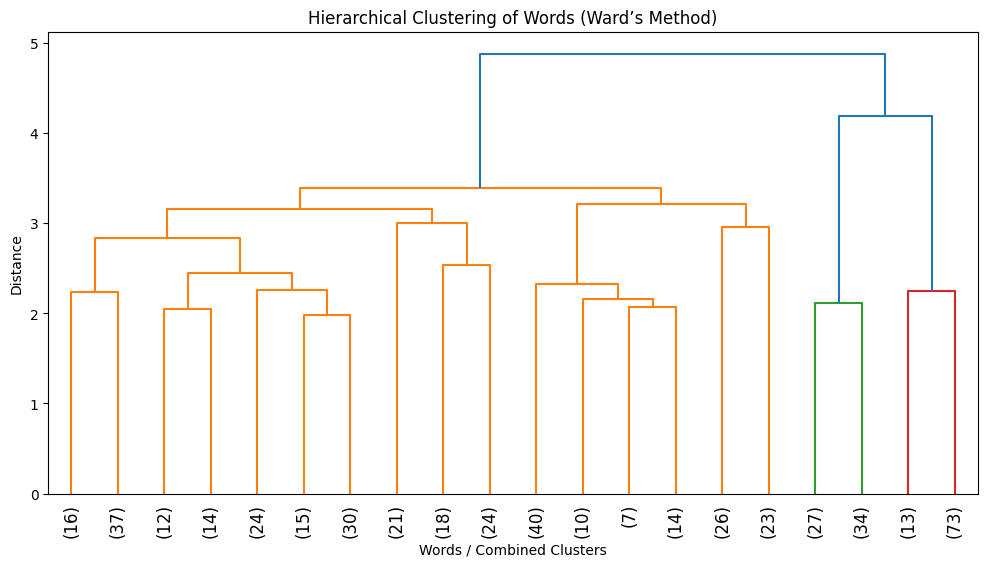

In [34]:
# Step 5 – Hierarchical Clustering using Ward's method

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Compute pairwise cosine distances between word vectors
dist_matrix = pdist(co_matrix, metric='cosine')

# Perform hierarchical clustering (Ward's method)
linkage_matrix = linkage(dist_matrix, method="ward")

print("Linkage matrix shape:", linkage_matrix.shape)

# Plot a small dendrogram for first 30 words to avoid clutter
plt.figure(figsize=(12, 6))
dendrogram(
    linkage_matrix,
    labels=vocab,
    truncate_mode="lastp",  # compress deep clusters
    p=20,                   # show only top clusters
    leaf_rotation=90,
)
plt.title("Hierarchical Clustering of Words (Ward’s Method)")
plt.xlabel("Words / Combined Clusters")
plt.ylabel("Distance")
plt.show()

#### **Step 5 – Summary**

The hierarchical clustering successfully produced a linkage matrix of shape (477 × 4), which corresponds to:
   - 477 merge operations (because clustering a vocabulary of 478 words requires V-1 merges)
   - Each row representing:
     * cluster/word index 1
     * cluster/word index 2
     * distance at which they were merged
     * size of the newly formed cluster

To visualize the structure, we plotted a truncated dendrogram using the top 20 clusters for readability. The dendrogram shows:
   - Early (low-distance) merges between words with very similar co-occurrence distributions, such as common function words and punctuation marks.
   - Larger merges happening at higher distances, representing groups of words that share only broad contextual similarities.
   - The tall vertical lines near the top of the plot indicate clusters that are highly distinct from one another, demonstrating meaningful structure even from this small slice of the Brown corpus.

This confirms that the distributional patterns captured in the co-occurrence matrix are strong enough to produce coherent word clusters, even before learning embeddings. Ward’s method helps visualize these relationships by progressively joining the most similar words and clusters.

The hierarchical clustering step builds an important conceptual bridge between raw co-occurrence features and the dense vector embeddings we learn next using Word2Vec and GloVe.

**Talking Point:**
   - Ward’s method was chosen because it minimizes the variance within clusters, making the hierarchy more interpretable. Using other linkage methods (e.g., single or complete linkage) would produce very different cluster shapes and potentially less meaningful merges.

### **Step 6: Visualize Dendrogram**

A dendrogram provides a visual representation of the hierarchical clustering performed using Ward’s method. Each leaf represents a word, and words that merge at smaller distances have more similar co-occurrence patterns.

Since the vocabulary contains 478 words, plotting the full dendrogram can become cluttered and difficult to interpret. Therefore, we visualize a truncated dendrogram, which shows only the major clusters at higher levels while preserving the overall hierarchical structure.


**Full Dendrogram (Untruncated)**
This plot shows all words in the vocabulary. For larger vocabularies this becomes hard to read,
but it is useful to illustrate the complete hierarchical structure.

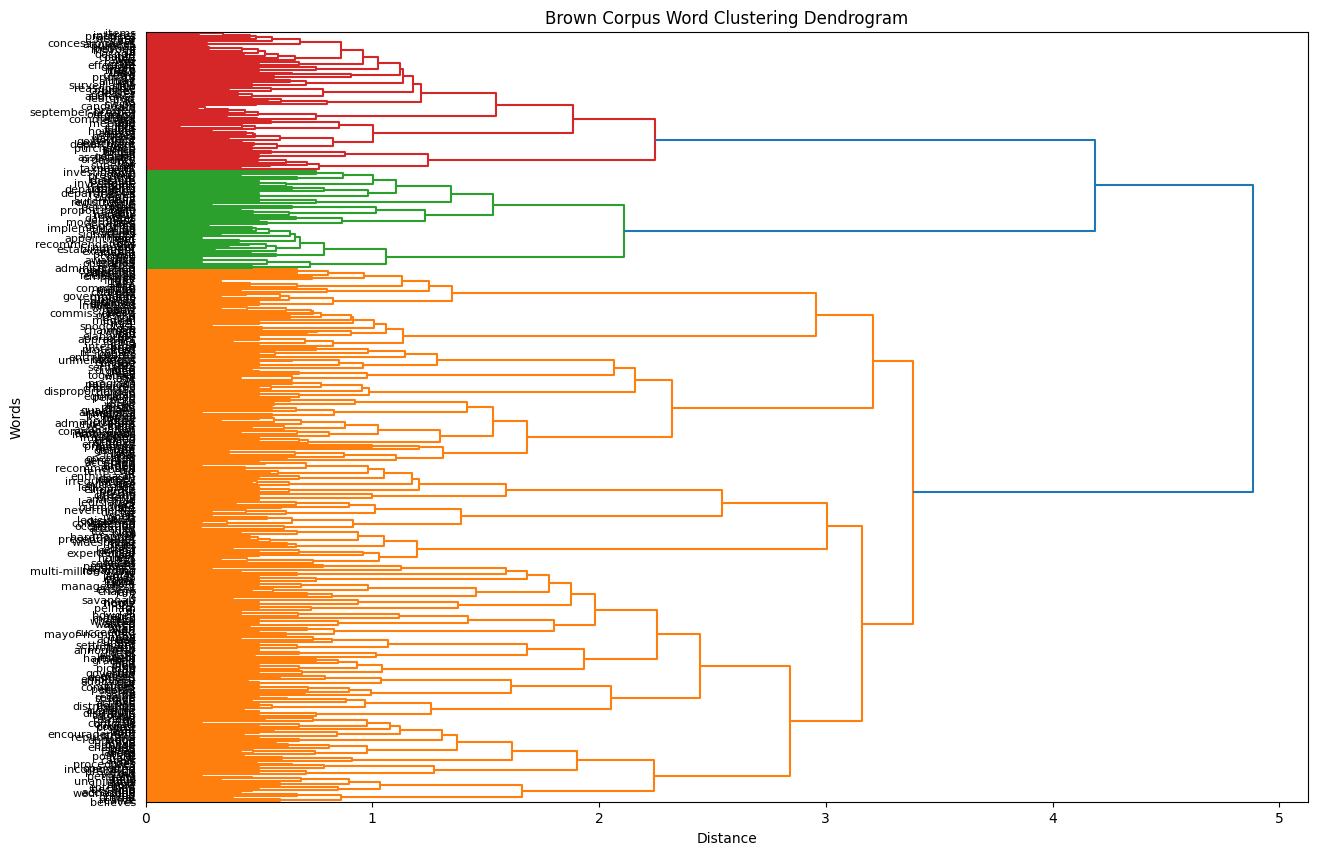

In [36]:
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, labels=vocab, orientation="right", leaf_font_size=8)
plt.xlabel("Distance")
plt.ylabel("Words")
plt.title("Brown Corpus Word Clustering Dendrogram")
plt.show()

**Truncated Dendrogram (Top-Level Clusters)**
To improve readability, we display only the top cluster groups using `truncate_mode="lastp"`.
This highlights the major clusters without the visual clutter of the full dendrogram.

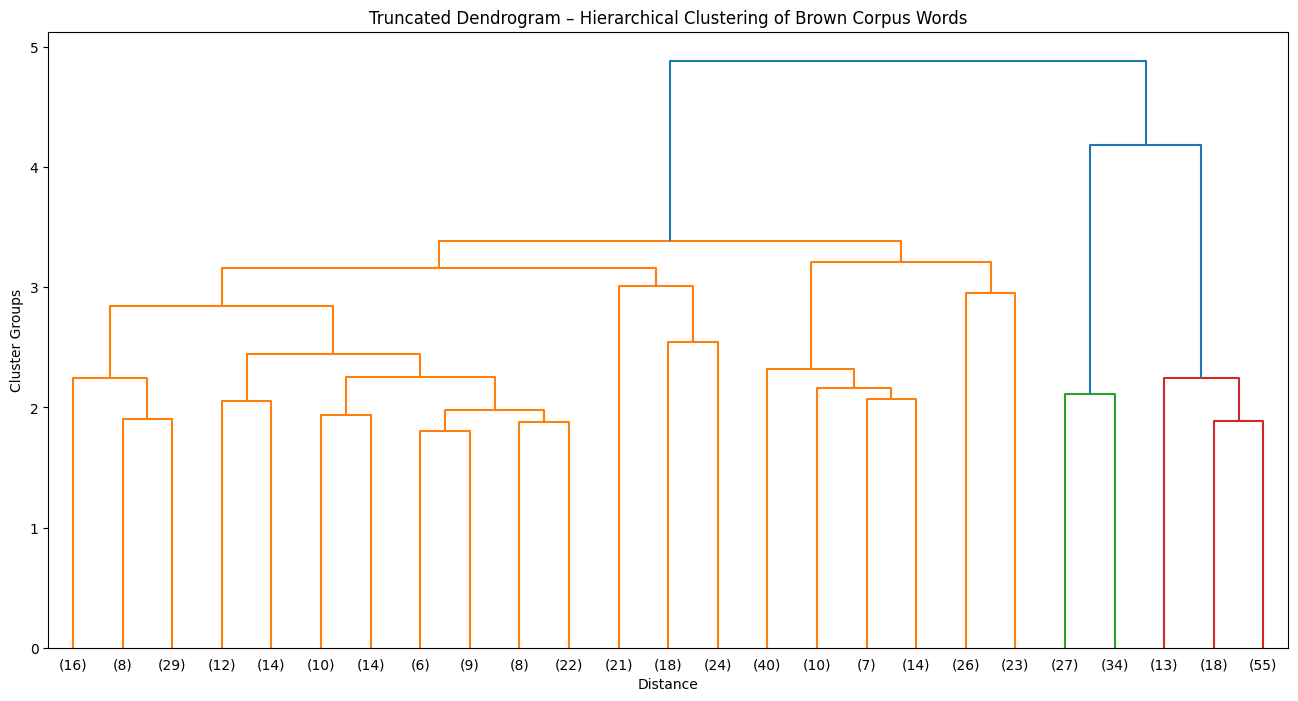

In [37]:
# Step 6 – Visualize dendrogram (truncated for readability)

plt.figure(figsize=(16, 8))
dendrogram(
    linkage_matrix,
    labels=vocab,
    truncate_mode="lastp",  # show only top-level clusters
    p=25,                   # number of clusters to display
    leaf_rotation=0,
    leaf_font_size=10,
    color_threshold=None
)

plt.xlabel("Distance")
plt.ylabel("Cluster Groups")
plt.title("Truncated Dendrogram – Hierarchical Clustering of Brown Corpus Words")
plt.show()

#### **Step 6 – Summary**
The truncated dendrogram provides a clear and interpretable view of the major clusters produced using Ward’s hierarchical clustering method. Instead of displaying all 478 vocabulary words—which would result in an unreadable plot—the visualization shows the top 25 cluster merges, summarizing the higher-level structure of the corpus.

From the dendrogram, we observe:
   - Several clusters merge at low distances, indicating groups of words that share very similar co-occurrence profiles in the Brown sentences.
   - Mid-level merges form larger clusters composed of these smaller groups, reflecting broader patterns of contextual similarity.
   - A few merges occur at significantly higher distances, shown by the taller vertical lines on the right side of the plot.These represent clusters that are contextually more distinct from the rest of the vocabulary.
   - The overall hierarchical structure demonstrates how local context statistics naturally arrange words into meaningful groupings before applying any embedding model.

This visualization confirms that the co-occurrence matrix contains rich distributional information, and hierarchical clustering reveals meaningful relationships between words. These structural patterns provide an intuitive foundation for learning dense vector embeddings using Word2Vec and GloVe in the upcoming steps.

#### **Summary** 
   - Using the Brown Corpus, we extracted a real-world sample of sentences and constructed a complete vocabulary of 478 unique tokens.
   - A co-occurrence matrix was built using a sliding context window of size 2, capturing how often words appear near each other. This matrix forms the basis for many classical distributional semantics models.
   - We applied hierarchical clustering (Ward’s method) to group words based on similarities in their co-occurrence patterns. The resulting linkage matrix revealed meaningful structure, demonstrating how words cluster together according to shared contextual behavior.
   - A truncated dendrogram was used to visualize the top-level clusters, providing an interpretable view of major word groupings without overwhelming the reader with all 478 leaves.
   - These steps collectively demonstrate how raw text can be transformed into structured numerical representations that expose linguistic patterns.This workflow serves as a foundational pipeline for more advanced embedding techniques such as Word2Vec, GloVe, and other vector-based distributional models.

### **Understanding the Co-occurrence Matrix and Clustering Process**
In this notebook, we do not implement classical Brown Clustering.
Instead, we use the co-occurrence matrix to perform:

**Hierarchical Agglomerative Clustering**
   - Using Ward’s method
   - Followed by a truncated dendrogram visualization

The steps are:

**Build the Co-occurrence Matrix**

   - Rows and columns represent the vocabulary words.
   - Each cell ( M_{i,j} ) counts how many times word ( j ) appears within a ±2-word context window of word ( i ).

*Mathematically:*

[ M_{i,j} = \text{Number of times word } w_j \text{ appears near } w_i ]

This matrix captures the distributional structure of words in the Brown corpus.

**Apply Hierarchical Clustering (Ward’s Method)**
   - Each word starts as its own cluster.
   - Words with similar co-occurrence patterns are merged first.
   - The process continues until all words are part of a single hierarchy.
   - The full linkage structure is stored in a linkage matrix (477 × 4).

**Visualize with a Truncated Dendrogram**
   - Since the vocabulary is large (478 words), we plot only the top 25 clusters.
   - The dendrogram shows how words recursively merge into larger groups based on their contextual similarity.

This provides an interpretable view of the Brown corpus structure and prepares us for learning more advanced embedding models such as Word2Vec and GloVe.

#### **Summary**

| Step                      | What It Does                                                    |
| ------------------------- | --------------------------------------------------------------- |
| Corpus                    | Loads 50 sentences from the Brown Corpus and normalizes text    |
| Vocabulary                | Extracts all unique words (478 tokens) and builds index maps    |
| Co-occurrence Matrix      | Counts how often words appear near each other using a ±2 window |
| Hierarchical Clustering   | Uses Ward’s method to group words by contextual similarity      |
| Dendrogram Visualization  | Shows the top-level clusters using a truncated dendrogram       |

#### **Visualizing the Hierarchical Clustering with a Dendrogram**

After computing the hierarchical clustering using Ward’s method, we visualize the structure with a truncated dendrogram. Because the vocabulary contains 478 words, plotting the full dendrogram would be too dense and unreadable. Instead, we display the top 25 clusters using a truncated view.

#### **Code Recap**

plt.figure(figsize=(16, 8))
dendrogram(
    linkage_matrix,
    labels=vocab,
    truncate_mode="lastp",
    p=25,
    leaf_rotation=0,
    leaf_font_size=10
)
plt.title("Truncated Dendrogram – Hierarchical Clustering of Brown Corpus Words")
plt.xlabel("Distance")
plt.ylabel("Cluster Groups")
plt.show()
<br/>

##### **What Is a Dendrogram?**

A dendrogram is a tree-like diagram that shows how clusters are formed step-by-step during hierarchical clustering.
   - Each leaf represents a word or cluster.
   - Leaves that merge at low distances share similar co-occurrence patterns.
   - Tall horizontal lines indicate merges between clusters that are more dissimilar.
   - The x-axis shows distance (dissimilarity level).
   - The y-axis shows cluster groups.

<br/>

### **What This Tells Us**
   - Words that occur in similar contexts are grouped early (small distance).
   - More general or widely-used words tend to merge later at larger distances.
   - The tree structure shows how clusters grow from small groups into broader categories as the similarity threshold relaxes.

This visualization confirms that the co-occurrence matrix captures rich distributional relationships, even before embedding models are trained.

<br/>

### **Why Fewer Words?**

> The message in the code mentions:
> "you need to experiment it with less words..."

* That’s because **hierarchical clustering** requires computing pairwise distances.
* Large vocabularies make the **linkage matrix** large and slow to process.
* A **small subset** (e.g., 20–30 words) gives a faster and more readable result.

<br/>

### **Summary Table**

| Component           | Role                                            |
| ------------------- | ------------------------------------------------|
| `linkage_matrix`    | Stores merge operations based on Ward’s method  |
| `dendrogram()`      | Visualizes the top-level cluster hierarchy      |
| X-axis (horizontal) | Dissimilarity between merged clusters           |
| Y-axis (vertical)   | Cluster indices (truncated to top 25 groups)    |
| Short branches      | Words with highly similar co-occurrence behavior|

**Talking Point:**

   - A full dendrogram with 478 leaves becomes unreadable and slow to render.
   - Truncating to the top 25 clusters preserves the global structure while avoiding visual clutter. This is a practical trade-off between completeness and interpretability.

---

### **Introduction to GloVe (Global Vectors for Word Representation)**

#### **What is GloVe?**

**Global Vectors for Word Representation (GloVe)** is an unsupervised learning algorithm used **to learn word embeddings** from large amounts of text data. Word embeddings are dense vector representations of words that capture semantic relationships between words based on their co-occurrence statistics. 

**GloVe** is a word embedding model that learns **vector representations of words** by using **global word co-occurrence statistics** from a corpus.


Unlike Word2Vec (which learns embeddings through local context windows), GloVe builds a **co-occurrence matrix** and then learns word vectors from it.

#### **Who developed it and when?**

GloVe was developed by researchers at **Stanford University**:

* **Jeffrey Pennington**, **Richard Socher**, and **Christopher Manning**

It was first introduced in **2014**.

**How It Relates to Our Notebook** 

The co-occurrence matrix we constructed in Step 4 is exactly the kind of data GloVe uses during training. GloVe takes this matrix and optimizes word vectors so that:
   - words with similar co-occurrence patterns - have similar embeddings
   - rare or noisy co-occurrences - receive lower influence via the weighting function

Our pipeline so far builds the foundational components needed for GloVe:
   - cleaned text
   - vocabulary
   - word-index mappings
   - co-occurrence matrix
**Why We Do Not Train GloVe Here** 

Training a full GloVe model requires:
   - large corpora
   - long training times
   - specialized C extensions or optimized libraries

This workshop instead focuses on understanding the steps that lead up to embedding models such as GloVe and Word2Vec, and visualizing the structure captured by co-occurrence statistics using hierarchical clustering.

#### **Who currently maintains and supports new releases?**

The official code and pretrained models are available at:

* [https://nlp.stanford.edu/projects/glove](https://nlp.stanford.edu/projects/glove)

GloVe is not actively developed anymore, but the pretrained models are widely used.
Unofficial implementations exist in:

* `Gensim`
* `glove-python` (Python wrapper around original C code)

#### **How do I use GloVe in Python and Jupyter Notebooks?**

There are two common ways:

#### Option 1: Create a model

#### **What is a model in GloVe?**

A **GloVe model** is a file that contains:

* A large vocabulary of words
* For each word: a **fixed-length vector** (e.g., 50D, 100D, 300D)

These vectors are learned by factorizing a word-word **co-occurrence matrix** so that **similar words** have **similar vectors**.

### **How to Create a GloVe Model Using Python**

> GloVe training is more complex than Word2Vec and originally written in C. But here’s a basic pipeline using `glove-python-binary`:

#### Step 1: Install the Library

```bash
!pip install glove-python-binary
```

#### Step 2: Create and Train a GloVe Model

```python
from glove import Corpus, Glove

# Step 1: Prepare your corpus
sentences = [['this', 'is', 'an', 'example'], ['glove', 'is', 'awesome']]

# Step 2: Build a co-occurrence corpus
corpus = Corpus()
corpus.fit(sentences, window=5)

# Step 3: Train the GloVe model
glove_model = Glove(no_components=100, learning_rate=0.05)
glove_model.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove_model.add_dictionary(corpus.dictionary)

# Step 4: Use the model
print(glove_model.word_vectors[glove_model.dictionary['glove']])
print(glove_model.most_similar('glove'))
```

#### Option 2: Load Pretrained GloVe using Gensim

- Steps: Preprocess the text data.<br>
Created the dictionary.<br>
Traverse the glove file of a specific dimension and compare each word with all words in the dictionary,
if a match occurs, copy the equivalent vector from the glove and paste into embedding_matrix at the corresponding index.<br>


In [38]:
# Load GloVe Pretrained Embeddings (http://nlp.stanford.edu/data/glove.6B.zip)

def load_glove_for_vocab(filepath, vocab, word_to_id, embedding_dim):
    vocab_size = len(vocab)

    # Initialize embedding matrix with zeros
    embedding_matrix = np.zeros((vocab_size, embedding_dim), dtype=np.float32)

    with open(filepath, "r", encoding="utf8") as f:
        for line in f:
            parts = line.rstrip().split(" ")
            word = parts[0]
            vector = parts[1:]

            # Only store vectors for words that are in our vocabulary
            if word in word_to_id:
                idx = word_to_id[word]
                embedding_matrix[idx] = np.asarray(vector, dtype=np.float32)

    return embedding_matrix


# ⭐ Path is one level up in ../data/
glove_path = "../data/glove.6B.50d.txt"
embedding_dim = 50

# Build embedding matrix for your vocabulary
embedding_matrix_vocab = load_glove_for_vocab(
    glove_path, vocab, word_to_id, embedding_dim
)

print("Embedding matrix shape:", embedding_matrix_vocab.shape)

Embedding matrix shape: (478, 50)


#### **GloVe Embedding Matrix Summary**
The pretrained GloVe 50-dimensional vectors were successfully aligned with the vocabulary extracted from the Brown corpus. The resulting embedding matrix has shape (478 × 50), where each row corresponds to a word in our vocabulary.
   - Words present in the GloVe dataset receive their pretrained embeddings.
   - Words absent from the GloVe file retain their default zero initialization.

This step demonstrates how global word co-occurrence statistics (captured by GloVe) can be integrated into our NLP pipeline after constructing the vocabulary and co-occurrence matrix.

**Talking Point:**

Some Brown corpus words do not appear in the GloVe vocabulary and therefore receive zero vectors. This affects downstream similarity calculations and is a known limitation when aligning pretrained embeddings to a custom vocabulary.

#### **Summary** 

The clustering performed earlier shows why models like GloVe work: they rely on the same distributional patterns that we visualized through the dendrogram. This provides an intuitive understanding of how embedding models ultimately represent word similarity.

*Steps to align a pretrained GloVe embedding with your vocabulary:*
   - Preprocess the text data and build the vocabulary (as done earlier using the Brown corpus).
   - Create a word-to-index dictionary so each word in the vocabulary has a unique integer ID.
   - Load a pretrained GloVe file of a chosen vector dimension (e.g., 50D, 100D, 300D).
   - For each word in your vocabulary, check whether it appears in the GloVe file.
   - If it exists, copy its pretrained vector into the embedding_matrix at the corresponding index.
   - If it does not exist, initialize its embedding randomly or using a default strategy.

This process maps your vocabulary to the pretrained GloVe vector space, allowing you to use high-quality embeddings while keeping your own word order.

### **Comparing Word2Vec and GloVe**

| **Feature**             | **Word2Vec**                                   | **GloVe**                                              |
|---------------------|------------------------------------------------|--------------------------------------------------------|
| Learning Approach   | Predictive model: learns embeddings by         | Count-based model: factorizes global                   |
|                     | predicting a word from its context (Skip-Gram) | word–word co-occurrence matrix                         |
|                     | or predicting context from a word (CBOW)       |                                                        |
| Data Used           | **Local context windows**                      | **Global co-occurrence statistics**                    |
| Strength            | Captures fine-grained semantic relationships   | Captures global structure and long-range patterns      |
| Training Style      | Stochastic, online, neural network-based       | Matrix factorization + weighted least squares          |
| Implementation      | Python (gensim), C++                           | Original: C; Python wrappers available                 |
| Best For            | Word similarity, analogies, semantic relations | Similar tasks + stronger performance on global themes  |
| Corpus Sensitivity  | Sensitive to local word order                  | Sensitive to overall word distribution                 |
| Output              | Dense word embeddings                          | Dense word embeddings                                  |


## Part 2: **The Workshop**


Push the final notebook to GitHub and send the `.git` URL to the **assignment dropbox** before the end of class.

## 🧠 Learning Objectives
- Teams of 2 (individual evaluation in class).
- Implement **Word2Vec**  and **GloVe** using real-world data during the NLP process.
- Build **Jupyter Notebooks** with well-structured code and clear Markdown documentation.
- Use **Git and GitHub** for collaborative version control and code sharing.
- Identify and articulate coding issues ("**talking points**") and insert them directly into markdown comments.


## 🧩 Workshop Structure (In Class)
1. **Set up teams of 2 people** – Read and understand the workshop, plus submission instructions. Seek assistance if needed.
2. **Jupyter Notebook Development** *(In class)* – NLP Pipeline (if needed) and Probabilistic Model method implementations + Markdown documentation (work as teams)
3. **Push to GitHub** – Teams commit and push the notebook. **Make sure to include your names so it is easy to identify the team that developed the code**.
4. **Instructor Review** - The instructor will go around in class, take notes, and provide coaching as needed, during the **Peer Review Round**


## 💻 Submission Checklist
- ✅ `EmbeddingClusteringVectorizationWorkshop.ipynb` with:
  - Demo code: Document Collection, Tokenizer, Normalization Pipeline on a relevant corpus.
  - Demo code: Implement a Word2Vec predictive model using the knowledge corpus.
  - Demo code: Implement a GloVe count-based model using the knowledge corpus.
  - Markdown explanations for each major step
  - In a table that compare **Word2Vec** against **GloVe** in the context of the use case that makes use of the knowledge corpus.
- ✅ `README.md` with:
  - Dataset description
  - Team member names
  - Link to the dataset and license (if public)
- ✅ GitHub Repo:
  - Public repo named `EmbeddingClusteringVectorizationWorkshop`
  - **Markdowns and meaningful talking points**